In [92]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn
import matplotlib.pyplot as plt
data = pd.read_csv('nesarc_pds.csv',low_memory=False)

,ETHRACE2A,ETOTLCA2,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,REGION,...,SOL12ABDEP,SOLP12ABDEP,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP
0,5,,1,4007,403,3928.613505,14,8,2001,4,...,0,0,0,0,0,0,0,0,0,0
1,5,0.0014,2,6045,604,3638.691845,12,1,2002,4,...,0,0,0,0,0,0,0,0,0,0
2,5,,3,12042,1218,5779.032025,23,11,2001,3,...,0,0,0,0,0,0,0,0,0,0
3,5,,4,17099,1704,1071.754303,9,9,2001,2,...,0,0,0,0,0,0,0,0,0,0
4,2,,5,17099,1704,4986.952377,18,10,2001,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43088,1,,43089,12010,1208,10477.240840,27,11,2001,3,...,0,0,0,0,0,0,0,0,0,0
43089,1,0.2237,43090,17099,1704,9014.746280,30,10,2001,2,...,0,0,0,0,0,0,0,0,0,0
43090,1,0.3785,43091,18094,1802,8079.917091,16,10,2001,2,...,0,0,0,0,0,0,0,0,0,0
43091,1,14.0831,43092,31035,3104,10367.259020,26,9,2001,2,...,0,3,0,3,0,3,0,0,0,0


In [93]:
data['AGE'] = pd.to_numeric(data['AGE'],errors='coerce')
data['REGION'] = pd.to_numeric(data['REGION'],errors='coerce')
data['S3AQ42'] = pd.to_numeric(data['S3AQ42'],errors='coerce')
data['S3BQ1A5'] = pd.to_numeric(data['S3BQ1A5'],errors='coerce')
data['S8Q1A2'] = pd.to_numeric(data['S8Q1A2'],errors='coerce')
data['S3BD5Q2E'] = pd.to_numeric(data['S3BD5Q2E'],errors='coerce')
data['MAJORDEP12'] = pd.to_numeric(data['MAJORDEP12'],errors='coerce')

In [94]:
subset1 = data[(data['AGE']>=25) & (data['AGE']<=40) & (data['REGION']==3)]
subsetc1 = subset1.copy()
subset2 = data[(data['AGE']>=18) & (data['AGE']<=30) & (data['S3BQ1A5']==1)]
subsetc2 = subset2.copy()


In [95]:
subsetc1['S3AQ42'] = subsetc1['S3AQ42'].replace(9,np.NaN)
subsetc1['S8Q1A2'] = subsetc1['S8Q1A2'].replace(9,np.NaN)
subsetc2['S3BD5Q2E'] = subsetc2['S3BD5Q2E'].replace(99,np.NaN)

In [96]:
cont1 = pd.crosstab(subsetc1['S8Q1A2'],subsetc1['S3AQ42'])
print(cont1)

colsum = cont1.sum()
contp = cont1/colsum
print(contp)


print ('Chi-square value, p value, expected counts, for fear/avoidance of heights within Cigar smoked status')
chsq1 = scipy.stats.chi2_contingency(cont1)
print(chsq1)

S3AQ42  1.0  2.0
S8Q1A2          
1.0       9   31
2.0      25  119
S3AQ42       1.0       2.0
S8Q1A2                    
1.0     0.264706  0.206667
2.0     0.735294  0.793333
Chi-square value, p value, expected counts, for fear/avoidance of heights within Cigar smoked status
(0.2606666666666667, 0.6096625154490937, 1, array([[  7.39130435,  32.60869565],
       [ 26.60869565, 117.39130435]]))


In [97]:
cont2 = pd.crosstab(subsetc2['MAJORDEP12'],subsetc2['S3BD5Q2E'])
print(cont2)

colsum = cont2.sum()
contp2 = cont2/colsum
print(contp2)

print('Chi-square value, p value, expected counts, for major depression within cannabis use status')
chsq2 = scipy.stats.chi2_contingency(cont2)
print(chsq2)

S3BD5Q2E    1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
MAJORDEP12                                                            
0            407   125   138   232   159   125    55   192   204   321
1            127    38    42    48    31    20     9    30    27    64
S3BD5Q2E        1.0       2.0       3.0       4.0       5.0       6.0   \
MAJORDEP12                                                               
0           0.762172  0.766871  0.766667  0.828571  0.836842  0.862069   
1           0.237828  0.233129  0.233333  0.171429  0.163158  0.137931   

S3BD5Q2E        7.0       8.0       9.0       10.0  
MAJORDEP12                                          
0           0.859375  0.864865  0.883117  0.833766  
1           0.140625  0.135135  0.116883  0.166234  
Chi-square value, p value, expected counts, for major depression within cannabis use status
(30.998970908375867, 0.0002961522419843985, 9, array([[436.74686717, 133.31411863, 147.21804511, 229.00584795,
    

<Figure size 1152x576 with 0 Axes>

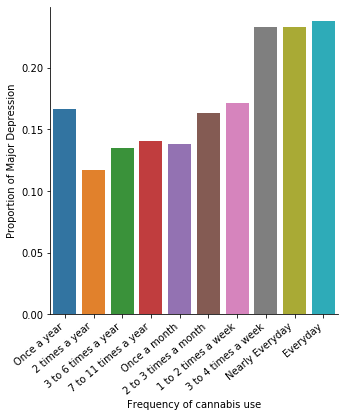

In [98]:
recode = {1:10,2:9,3:8,4:7,5:6,6:5,7:4,8:3,9:2,10:1}
subsetc2['CUFREQ'] = subsetc2['S3BD5Q2E'].map(recode)
subsetc2['CUFREQ'] = subsetc2['CUFREQ'].astype('category')
subsetc2['CUFREQ'] = subsetc2['CUFREQ'].cat.rename_categories(['Once a year','2 times a year','3 to 6 times a year','7 to 11 times a year','Once a month','2 to 3 times a month','1 to 2 times a week','3 to 4 times a week','Nearly Everyday','Everyday'])

plt.figure(figsize=(16,8))
ax1 = seaborn.catplot(x='CUFREQ',y='MAJORDEP12', data=subsetc2, kind="bar", ci=None)
ax1.set_xticklabels(rotation=40, ha="right")
plt.xlabel('Frequency of cannabis use')
plt.ylabel('Proportion of Major Depression')
plt.show()

In [101]:
recode={1:1,9:9}
subsetc2['COMP1v9'] = subsetc2['S3BD5Q2E'].map(recode)

cont3 = pd.crosstab(subsetc2['MAJORDEP12'],subsetc2['COMP1v9'])
print(cont3)

colsum = cont3.sum()
contp3 = cont3/colsum
print(contp3)

print('Chi-square value, p value, expected counts, for major depression within pair comparisons of frequency groups -Everyday- and -2 times a year-')
chsq3 = scipy.stats.chi2_contingency(cont3)
print(chsq3)

COMP1v9     1.0  9.0
MAJORDEP12          
0           407  204
1           127   27
COMP1v9          1.0       9.0
MAJORDEP12                    
0           0.762172  0.883117
1           0.237828  0.116883
Chi-square value, p value, expected counts, for major depression within pair comparisons of frequency groups -Everyday- and -2 times a year-
(13.927269272426965, 0.00019002157079698866, 1, array([[426.50196078, 184.49803922],
       [107.49803922,  46.50196078]]))


In [102]:
recode={4:4,9:9}
subsetc2['COMP4v9'] = subsetc2['S3BD5Q2E'].map(recode)

cont4 = pd.crosstab(subsetc2['MAJORDEP12'],subsetc2['COMP4v9'])
print(cont4)

colsum = cont4.sum()
contp4 = cont4/colsum
print(contp4)

print('Chi-square value, p value, expected counts, for major depression within pair comparisons of frequency groups -1 to 2 times a week- and -2 times a year-')
chsq4 = scipy.stats.chi2_contingency(cont4)
print(chsq4)

COMP4v9     4.0  9.0
MAJORDEP12          
0           232  204
1            48   27
COMP4v9          4.0       9.0
MAJORDEP12                    
0           0.828571  0.883117
1           0.171429  0.116883
Chi-square value, p value, expected counts, for major depression within pair comparisons of frequency groups -1 to 2 times a week- and -2 times a year-
(2.5873932849133556, 0.10771748312106895, 1, array([[238.90410959, 197.09589041],
       [ 41.09589041,  33.90410959]]))
